# 1. This notebook is used for the initial data analysis
## 1. Step 1: import libraries and csv file and clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
file_path = r'c:\Users\samve\OneDrive\0BeCode\repos\immo-data-processing\Data\Filtered_Data\house_details_v1.csv'
df_to_be_cleaned = pd.read_csv(file_path, index_col='id', skip_blank_lines=True)
print(f'Df rows: {df_to_be_cleaned.shape[0]}')
print(df_to_be_cleaned.head())

Df rows: 19963
               Street Housenumber Box  Floor    City Postalcode       Type  \
id                                                                           
10683823  Egmont Park          11   0    1.0  Gavere       9890  APARTMENT   
10683826  Egmont Park          11   0    1.0  Gavere       9890  APARTMENT   
10683817  Egmont Park          11   0    2.0  Gavere       9890  APARTMENT   
10683816  Egmont Park          11   0    2.0  Gavere       9890  APARTMENT   
10683825  Egmont Park          11   0    1.0  Gavere       9890  APARTMENT   

            Subtype Location area    Region  ... Terrace surface Garden  \
id                                           ...                          
10683823  APARTMENT         URBAN  FLANDERS  ...            11.0      0   
10683826  APARTMENT         URBAN  FLANDERS  ...            10.0      0   
10683817  APARTMENT         URBAN  FLANDERS  ...            11.0      0   
10683816  APARTMENT         URBAN  FLANDERS  ...            11.

2. Clean data:
    1. Strip blank spaces
    2. Convert selected columns to integers
    3. Drop all rows with zero values from selected columns
    4. Remove duplicates by subset
    5. Remove outliers if needed

In [2]:
for col in df_to_be_cleaned.columns:
    # Checking datatype of each column
    if df_to_be_cleaned[col].dtype == 'object':
        # Applying strip function and lowercase only if the value is a string
        df_to_be_cleaned[col] = df_to_be_cleaned[col].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)
print(df_to_be_cleaned.head())
print(df_to_be_cleaned[df_to_be_cleaned['Street'] == 'Egmont Park'])
        
        

               Street Housenumber Box  Floor    City Postalcode       Type  \
id                                                                           
10683823  egmont park          11   0    1.0  gavere       9890  apartment   
10683826  egmont park          11   0    1.0  gavere       9890  apartment   
10683817  egmont park          11   0    2.0  gavere       9890  apartment   
10683816  egmont park          11   0    2.0  gavere       9890  apartment   
10683825  egmont park          11   0    1.0  gavere       9890  apartment   

            Subtype Location area    Region  ... Terrace surface Garden  \
id                                           ...                          
10683823  apartment         urban  flanders  ...            11.0      0   
10683826  apartment         urban  flanders  ...            10.0      0   
10683817  apartment         urban  flanders  ...            11.0      0   
10683816  apartment         urban  flanders  ...            11.0      0   
106

In [3]:
#Convert selected rows to int
columns_to_int = ['Price', 'Postalcode', 'Construction year', 'Bedroom count', 'Facades']
for column in columns_to_int:
    if df_to_be_cleaned[column].dtype == 'object':
        df_to_be_cleaned[column] = df_to_be_cleaned[column].str.replace('\D', '', regex=True)  # Remove non-numeric characters
        df_to_be_cleaned = df_to_be_cleaned[df_to_be_cleaned[column] != '']  # Drop rows with empty values
        
        df_to_be_cleaned[column] = df_to_be_cleaned[column].astype('int64')  # Convert column to integers
    else:
        df_to_be_cleaned[column] = df_to_be_cleaned[column].astype('int64')  # Convert numeric column to integers
print(f'Df rows after step 2: {df_to_be_cleaned.shape[0]}\n{df_to_be_cleaned.info()}')

<class 'pandas.core.frame.DataFrame'>
Index: 19963 entries, 10683823 to 10664014
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Street             19963 non-null  object 
 1   Housenumber        19963 non-null  object 
 2   Box                19963 non-null  object 
 3   Floor              19963 non-null  float64
 4   City               19963 non-null  object 
 5   Postalcode         19963 non-null  int64  
 6   Type               19963 non-null  object 
 7   Subtype            19963 non-null  object 
 8   Location area      19963 non-null  object 
 9   Region             19963 non-null  object 
 10  District           19963 non-null  object 
 11  Province           19963 non-null  object 
 12  Price              19963 non-null  int64  
 13  Type of sale       19963 non-null  object 
 14  Construction year  19963 non-null  int64  
 15  Total surface      19963 non-null  float64
 16  Habitable surface

In [4]:
#Drop rows with zero values (none, nan from scrape)
columns_to_check = ['Street', 'City', 'Postalcode', 'Region', 'Price', 'Construction year']
# Iterate over the columns and drop rows with 0 or '0' values
for column in columns_to_check:
    if df_to_be_cleaned[column].dtype == 'object':
        df_to_be_cleaned = df_to_be_cleaned[df_to_be_cleaned[column] != '0']
    elif df_to_be_cleaned[column].dtype == 'int64':
        df_to_be_cleaned = df_to_be_cleaned[df_to_be_cleaned[column] != 0]
    else:
        df_to_be_cleaned = df_to_be_cleaned[df_to_be_cleaned[column] != 0.0]
print(f'Df rows after step 3: {df_to_be_cleaned.shape[0]}')

Df rows after step 3: 11004


In [5]:
#Remove duplicates by subset
print(f'Df rows: {df_to_be_cleaned.shape[0]}')
duplicates = df_to_be_cleaned[df_to_be_cleaned.duplicated(subset=['Latitude', 'Longitude', 'Type', 'Subtype', 'Price', 'District', 'City', 'Street', 'Housenumber', 'Box', 'Floor', 'Habitable surface'], keep=False)]
print(f'Amount of duplicates: {duplicates.shape[0]}')
df = df_to_be_cleaned.drop_duplicates(subset=['Latitude', 'Longitude', 'Type', 'Subtype', 'Price', 'District', 'City', 'Street', 'Housenumber', 'Box', 'Floor', 'Habitable surface'], keep='first')

print(f'Amount of rows after step 4: {df.shape[0]}')
print(f'Number of rows (listings) final df: {df.shape[0]}')

Df rows: 11004
Amount of duplicates: 3007
Amount of rows after step 4: 9452
Number of rows (listings) final df: 9452


In [6]:
# LabelEncoder will give numerical values to the following columns in the list:
columns_to_encode = ['Kitchen type', 'Furnished', 'Terrace', 'Garden', 'SwimmingPool', 'Condition', 'EPC score']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode the columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
# Convert the label encoded columns to numeric data types
numeric_columns = ['Kitchen type', 'Furnished', 'Terrace', 'Garden', 'SwimmingPool', 'Condition', 'EPC score']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Print the updated DataFrame with converted data types
print(df.dtypes)

Street                object
Housenumber           object
Box                   object
Floor                float64
City                  object
Postalcode             int64
Type                  object
Subtype               object
Location area         object
Region                object
District              object
Province              object
Price                  int64
Type of sale          object
Construction year      int64
Total surface        float64
Habitable surface    float64
Bedroom count          int64
Kitchen type           int32
Furnished              int32
Fireplace               bool
Terrace                int32
Terrace surface      float64
Garden                 int32
Garden surface       float64
Facades                int64
SwimmingPool           int32
Condition              int32
EPC score              int32
Latitude             float64
Longitude            float64
Property url          object
dtype: object


C:\Users\samve\AppData\Local\Temp\ipykernel_20304\2919034703.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\samve\AppData\Local\Temp\ipykernel_20304\2919034703.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\samve\AppData\Local\Temp\ipykernel_20304\2919034703.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Result:
- No duplicates
- No blank spaces (ex: `" I love python "` => `"I love python"`)
- No errors
- No empty values

2. Step 2 data anylises:
2.1: - How many rows and columns?

In [7]:
df.info()
print(df.head())



<class 'pandas.core.frame.DataFrame'>
Index: 9452 entries, 10683823 to 10664025
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Street             9452 non-null   object 
 1   Housenumber        9452 non-null   object 
 2   Box                9452 non-null   object 
 3   Floor              9452 non-null   float64
 4   City               9452 non-null   object 
 5   Postalcode         9452 non-null   int64  
 6   Type               9452 non-null   object 
 7   Subtype            9452 non-null   object 
 8   Location area      9452 non-null   object 
 9   Region             9452 non-null   object 
 10  District           9452 non-null   object 
 11  Province           9452 non-null   object 
 12  Price              9452 non-null   int64  
 13  Type of sale       9452 non-null   object 
 14  Construction year  9452 non-null   int64  
 15  Total surface      9452 non-null   float64
 16  Habitable surface 

2.3 - What is the correlation between the variables and the price? (Why might that be?)
    Verry small correclation between variables and price, except for habitable surface and bedroom count, people want as much room as they can for the least money.

This code calculates the correlation coefficients between the numerical columns and the 'Price' column in the DataFrame and visualizes the results using a heatmap.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for correlation analysis
numerical_columns = ['Floor', 'Postalcode', 'Price', 'Construction year', 'Total surface',
                     'Habitable surface', 'Bedroom count', 'Terrace surface', 'Garden surface',
                     'Facades', 'Kitchen type', 'Terrace',
                     'Garden', 'EPC score']

heatmap_width = 8
heatmap_height = 6
plt.figure(figsize=(heatmap_width, heatmap_height))
# Creating a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Clean up the plot
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Add a color bar
heatmap.collections[0].colorbar.set_label('Correlation')
plt.savefig("Correlation Matrix.png")
# Show the plot or save it to a file
plt.show()




NameError: name 'df' is not defined

<Figure size 800x600 with 0 Axes>

### 2.3 How are variable correlated to each other?
    There is no strong correlation between the variables itself, safe the construction year and EPC score (for the obvious reason that the Belgian government and energy price is obligating new builders to isolate more when building new properties)

### 2.4 Which variables have the greatest influence on the price?
            That would be the habitable surface.
            Anything to do with 'area' variables or number of rooms.
### 2.5 Which variables have the least influence on the price?
            That would be kitchen type.

### 2.6 How many qualitative and quantitative variables are there? How would you transform these values into numerical values?
        There is 6 columns with qualitative values.
        I have allready transformed them to numerical values with the sklearn.LabelEncoder

### 2.7 Percentage of missing values per column?
    no missing values (NaN)
            

In [9]:
print(df.isnull().sum() * 100 / len(df))
print(df[df == 0].count(axis=0)/len(df.index)*100)

Street               0.0
Housenumber          0.0
Box                  0.0
Floor                0.0
City                 0.0
Postalcode           0.0
Type                 0.0
Subtype              0.0
Location area        0.0
Region               0.0
District             0.0
Province             0.0
Price                0.0
Type of sale         0.0
Construction year    0.0
Total surface        0.0
Habitable surface    0.0
Bedroom count        0.0
Kitchen type         0.0
Furnished            0.0
Fireplace            0.0
Terrace              0.0
Terrace surface      0.0
Garden               0.0
Garden surface       0.0
Facades              0.0
SwimmingPool         0.0
Condition            0.0
EPC score            0.0
Latitude             0.0
Longitude            0.0
Property url         0.0
dtype: float64
Street                0.000000
Housenumber           0.000000
Box                   0.000000
Floor                66.017774
City                  0.000000
Postalcode            0.000000

In [10]:
df['Type'] = df['Type'].replace(['apartment', 'house'], ['0', '1'])
column_values = df['Type']

print(column_values)


id
10683823    0
10683826    0
10683817    0
10683816    0
10683825    0
           ..
10664055    0
10664058    0
10664033    0
10664031    0
10664025    1
Name: Type, Length: 9452, dtype: object


C:\Users\samve\AppData\Local\Temp\ipykernel_20304\763661757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].replace(['apartment', 'house'], ['0', '1'])


##### Step 3 : Data Interpretation
##### 3.1 Plot the outliers

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9452 entries, 10683823 to 10664025
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Street             9452 non-null   object 
 1   Housenumber        9452 non-null   object 
 2   Box                9452 non-null   object 
 3   Floor              9452 non-null   float64
 4   City               9452 non-null   object 
 5   Postalcode         9452 non-null   int64  
 6   Type               9452 non-null   object 
 7   Subtype            9452 non-null   object 
 8   Location area      9452 non-null   object 
 9   Region             9452 non-null   object 
 10  District           9452 non-null   object 
 11  Province           9452 non-null   object 
 12  Price              9452 non-null   int64  
 13  Type of sale       9452 non-null   object 
 14  Construction year  9452 non-null   int64  
 15  Total surface      9452 non-null   float64
 16  Habitable surface 

<Axes: xlabel='Price', ylabel='Garden surface'>

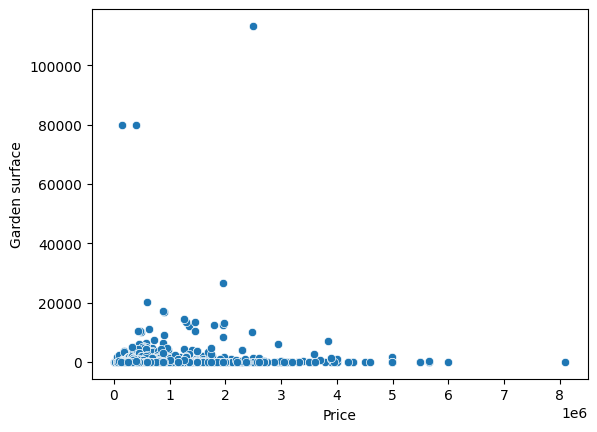

In [12]:
#df.boxplot(column=['Price', 'Construction year', 'Total surface', 'Habitable surface', 'Bedroom count'], by='id')
sns.scatterplot(data=df, x='Price', y='Garden surface')

3. Transforming the data for plotting to discover usefull information

In [13]:
regions = ['flanders', 'brussels', 'wallonie']
flanders = df.loc[df['Region'] == 'flanders']
wallonie = df.loc[df['Region'] == 'wallonie']
brussels = df.loc[df['Region'] == 'brussels']
other = df.query('Region not in @regions')
print(flanders.shape[0])
print(wallonie.shape[0])
print(brussels.shape[0])
print(other.shape[0])
print(f'total amount = {flanders.shape[0] + brussels.shape[0] + wallonie.shape[0] + other.shape[0]}')

5687
1975
1790
0
total amount = 9452


3. 1. Create 1st plot to see the amount of data per region.

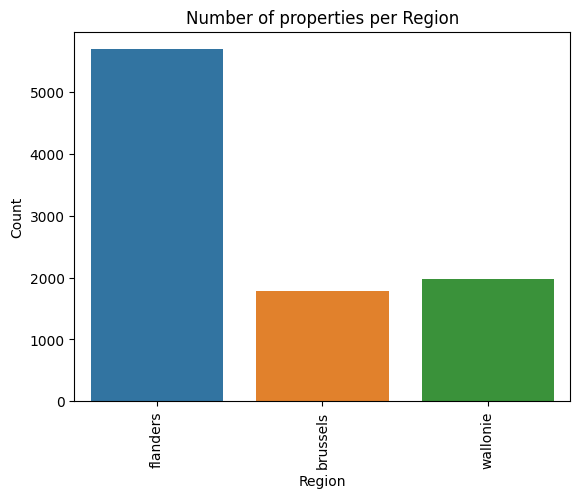

In [14]:
# Create the count plot
sns.countplot(data=df, x='Region')

# Set plot title and labels
plt.title('Number of properties per Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

3. 2. Create distribution plots to see distribution in the dataset, and what key values are interesting to investigate.

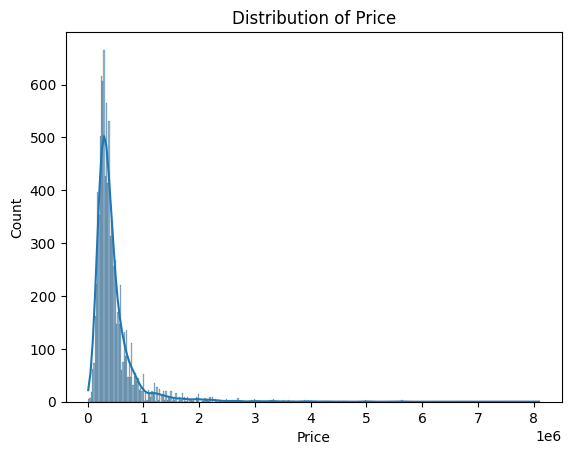

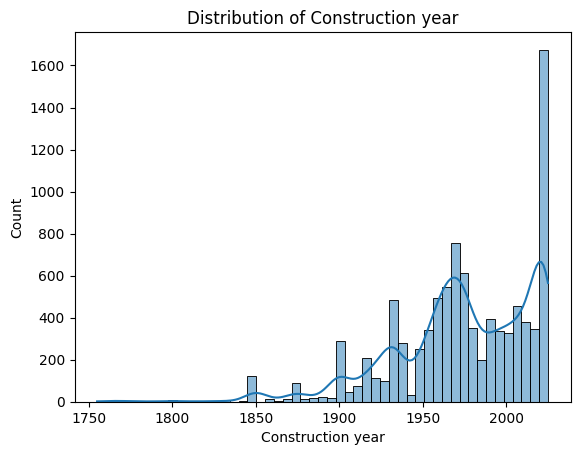

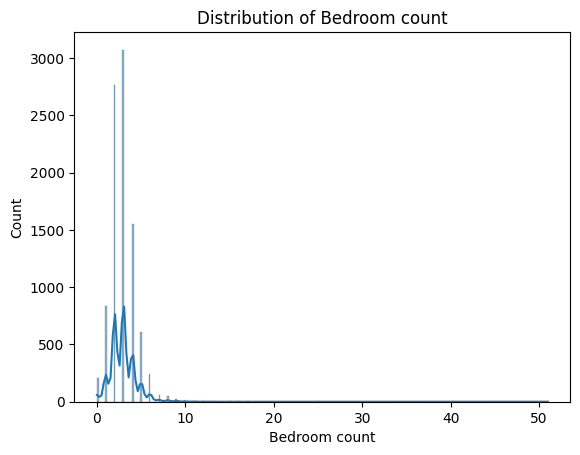

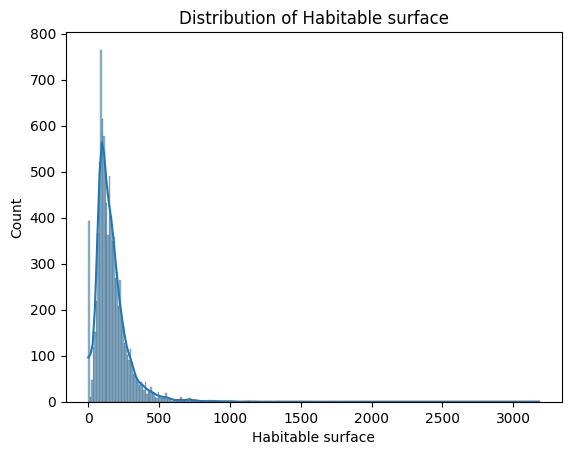

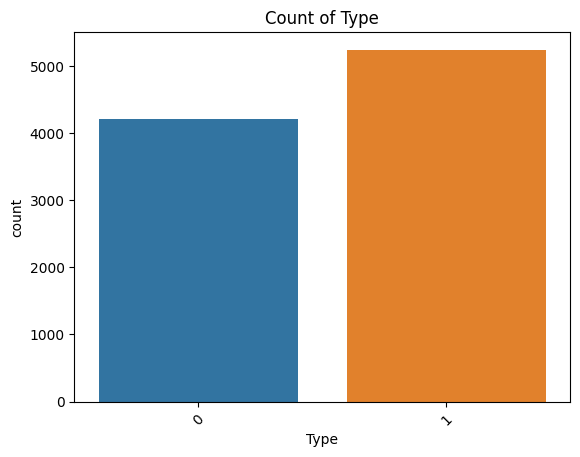

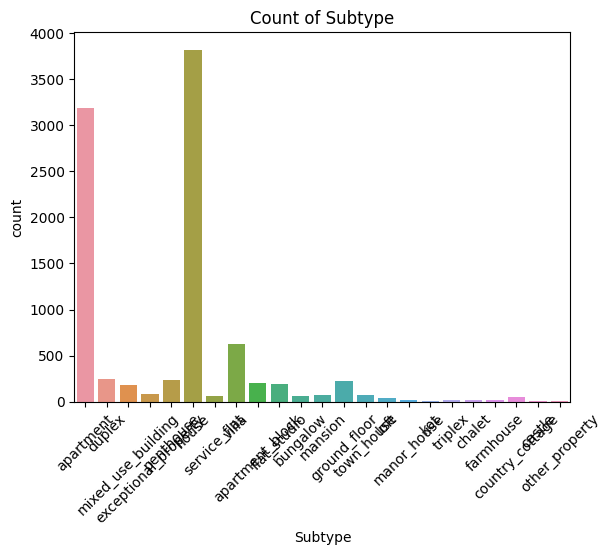

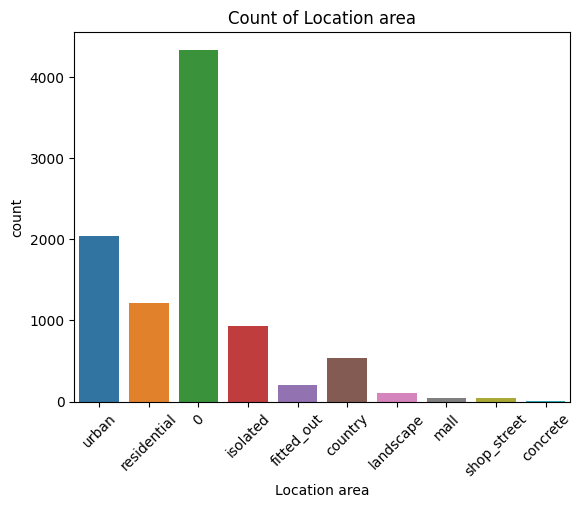

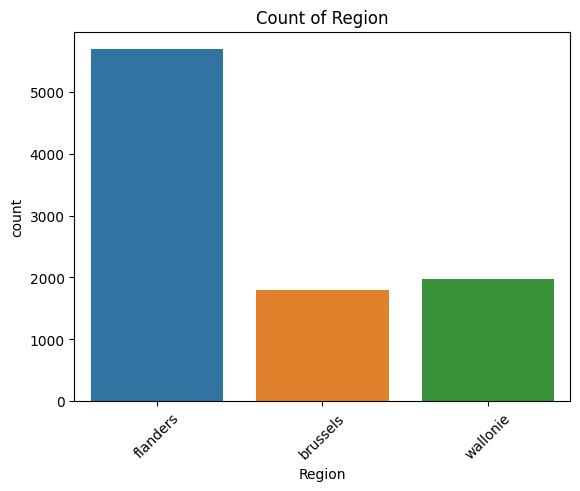

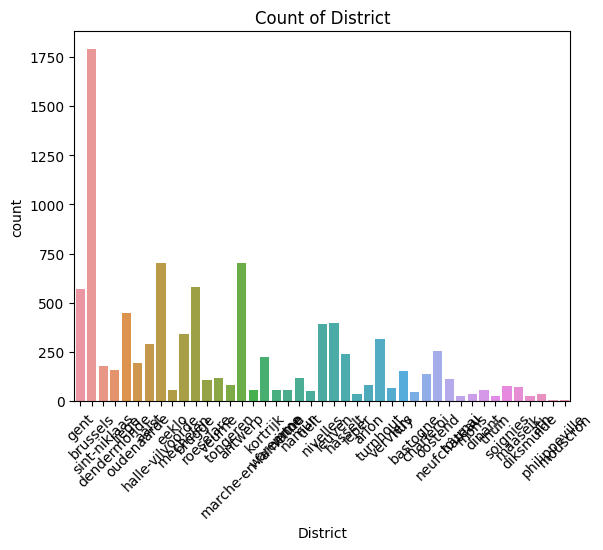

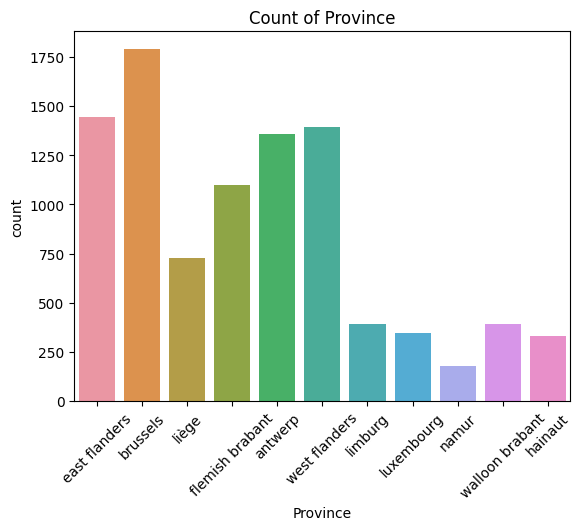

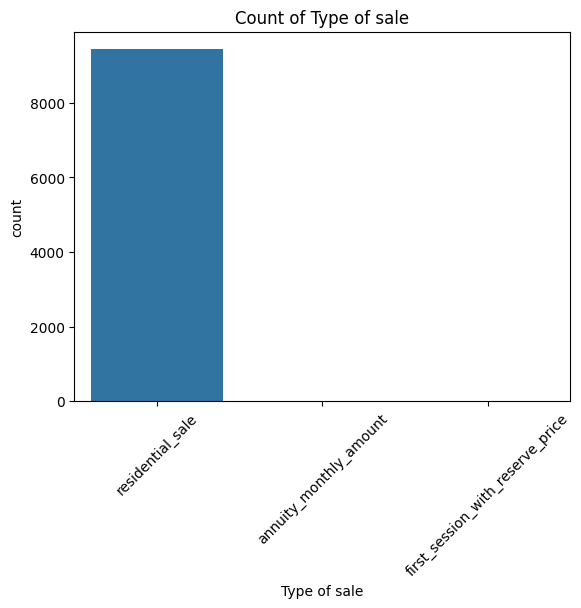

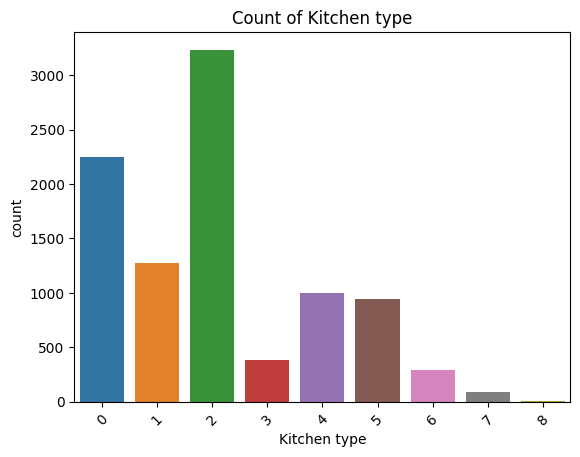

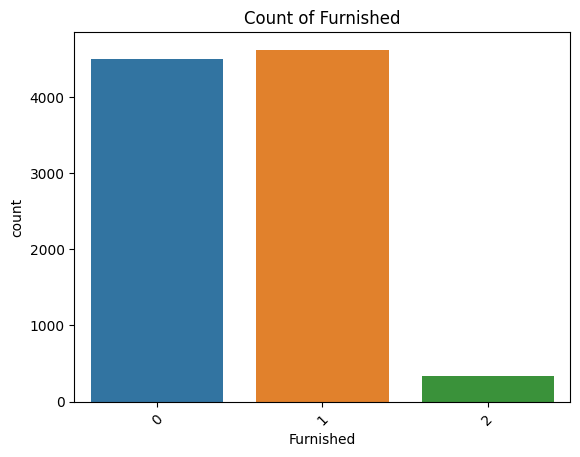

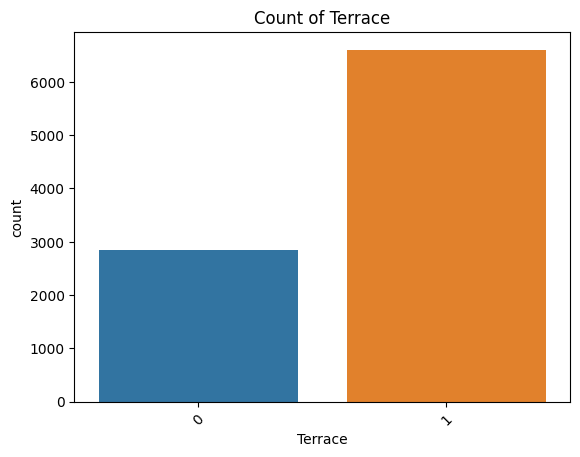

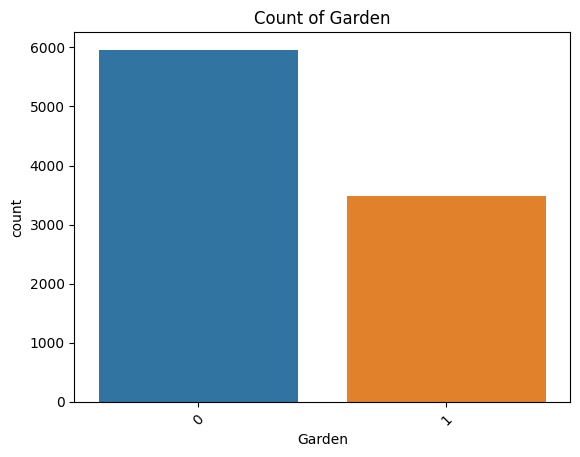

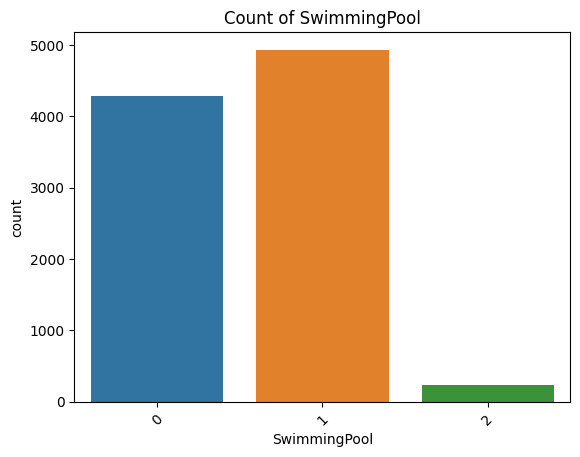

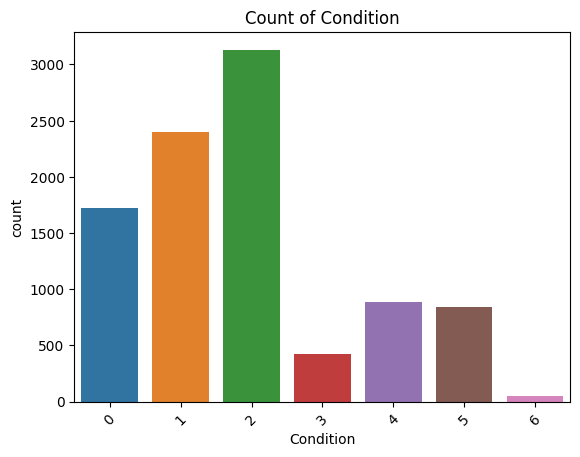

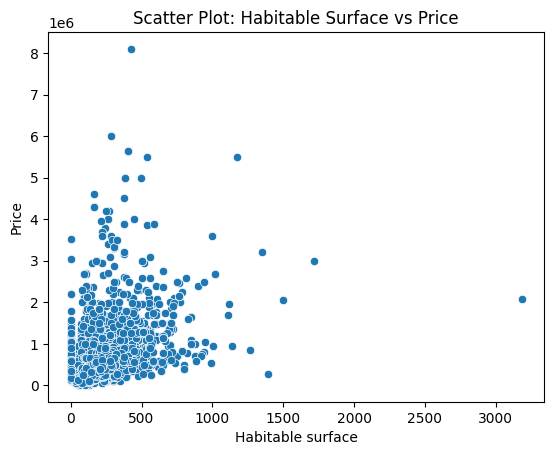

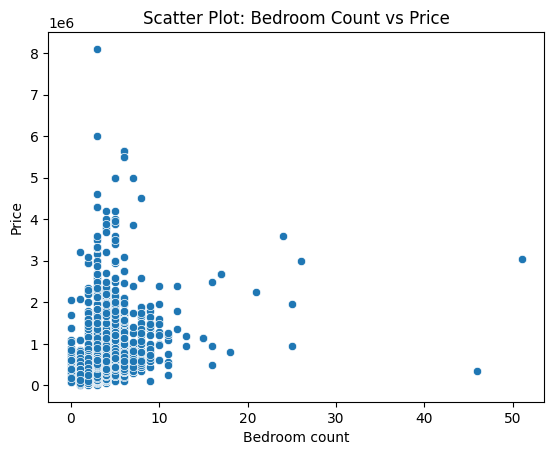

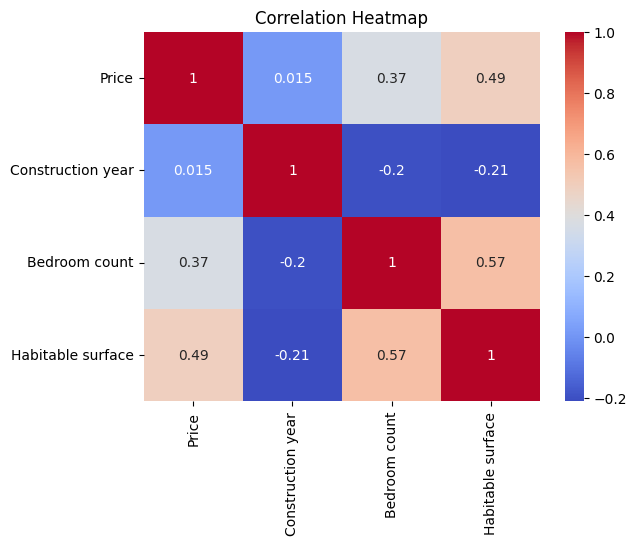

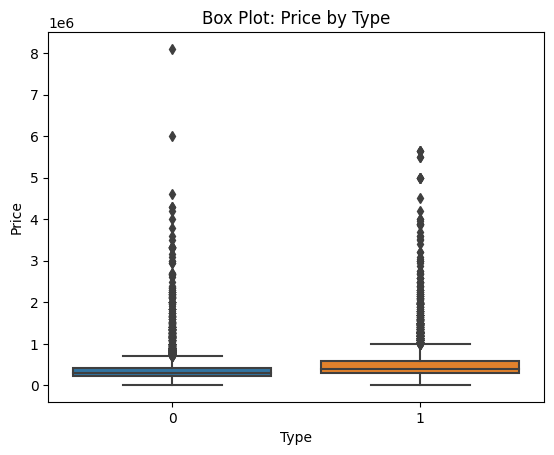

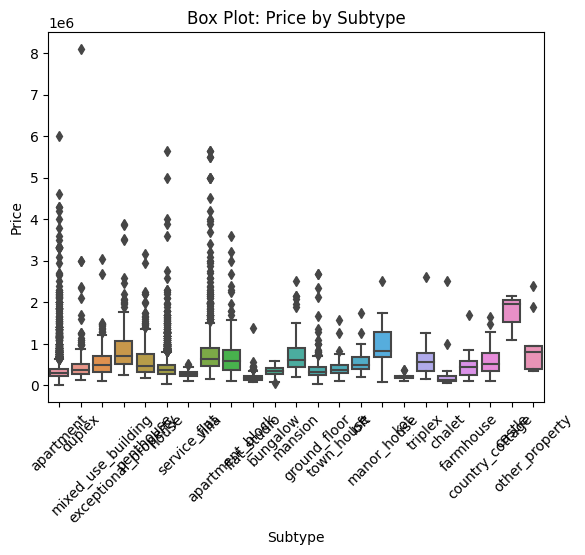

In [15]:
# Histograms
numeric_columns = ['Price', 'Construction year', 'Bedroom count', 'Habitable surface']
for column in numeric_columns:
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

# Bar Plots
categorical_columns = ['Type', 'Subtype', 'Location area', 'Region', 'District', 'Province', 'Type of sale', 'Kitchen type', 'Furnished', 'Terrace', 'Garden', 'SwimmingPool', 'Condition']
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

# Scatter Plots
sns.scatterplot(data=df, x='Habitable surface', y='Price')
plt.title('Scatter Plot: Habitable Surface vs Price')
plt.show()

sns.scatterplot(data=df, x='Bedroom count', y='Price')
plt.title('Scatter Plot: Bedroom Count vs Price')
plt.show()

# Correlation Heatmap
numeric_variables = df[numeric_columns]
correlation_matrix = numeric_variables.corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box Plots
sns.boxplot(data=df, x='Type', y='Price')
plt.title('Box Plot: Price by Type')
plt.show()

sns.boxplot(data=df, x='Subtype', y='Price')
plt.title('Box Plot: Price by Subtype')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

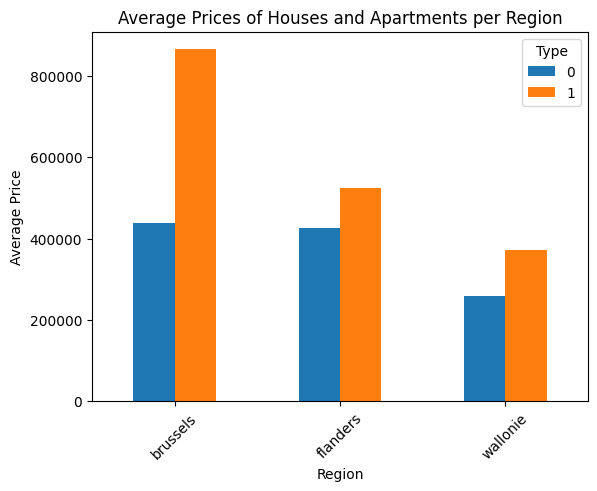

<Figure size 640x480 with 0 Axes>

In [16]:
average_prices = df.groupby(['Region', 'Type'])['Price'].mean().unstack()

# Create the plot
plt.figure(figsize=(12, 6))
average_prices.plot(kind='bar')
plt.title('Average Prices of Houses and Apartments per Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()
plt.savefig("Prices_per_region.png")


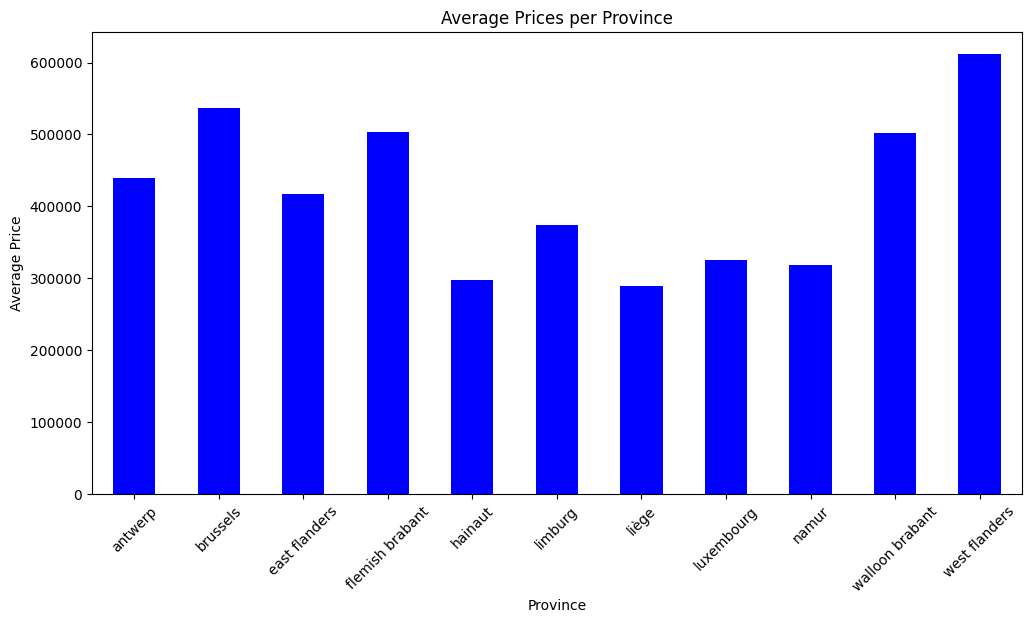

In [17]:
average_prices = df.groupby('Province')['Price'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
average_prices.plot(kind='bar', color='blue')
plt.title('Average Prices per Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

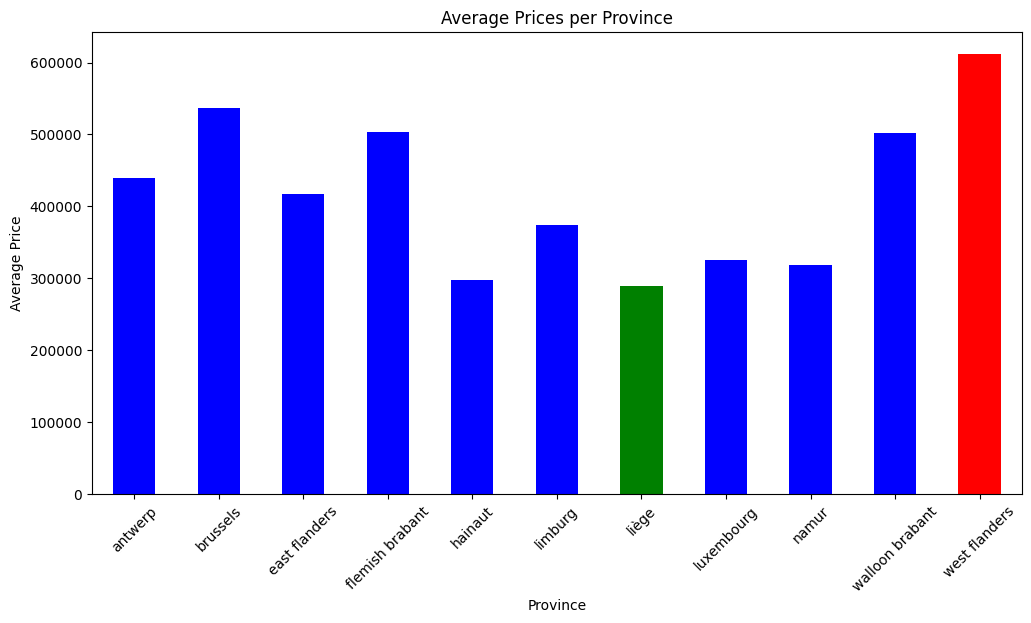

In [18]:
# Calculate average prices per province
average_prices = df.groupby('Province')['Price'].mean()

# Find the highest and lowest average prices
highest_price_province = average_prices.idxmax()
lowest_price_province = average_prices.idxmin()

# Create the plot
plt.figure(figsize=(12, 6))
ax = average_prices.plot(kind='bar', color='blue')
ax.patches[average_prices.index.get_loc(highest_price_province)].set_facecolor('red')
ax.patches[average_prices.index.get_loc(lowest_price_province)].set_facecolor('green')

plt.title('Average Prices per Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Started using plotly, to me it is beter to have interactive plots

In [19]:
fig1 = px.histogram(df, x='Price', nbins=30, title='Overall Price Distribution')

# Price distribution for each region
fig2 = px.histogram(df, x='Price', nbins=30, facet_col='Region', title='Price Distribution by Region')

# Display the plots
fig1.show()
fig2.show()

In [20]:
# Overall price distribution
fig1 = px.box(df, y='Price', title='Overall Price Distribution')

# Price distribution for each region
fig2 = px.box(df, x='Region', y='Price', title='Price Distribution by Region')

# Display the plots
fig1.show()
fig2.show()

Drop outliers

In [21]:
# Define the conditions for filtering
condition_flanders = (df['Region'] == 'FLANDERS') & (df['Price'] > 1500000)
condition_brussels = (df['Region'] == 'BRUSSELS') & (df['Price'] > 1500000)

# Drop the rows based on the conditions
df = df[~(condition_flanders | condition_brussels)]

In [22]:
# Overall price distribution
fig1 = px.box(df, y='Price', title='Overall Price Distribution')

# Price distribution for each region
fig2 = px.box(df, x='Region', y='Price', title='Price Distribution by Region')

# Display the plots
fig1.show()
fig2.show()

In [23]:
# Calculate the amount of listings for the DataFrame
df['Amount_Listings'] = df.groupby('Region')['Price'].transform('count')

# Scatter plot for amount of listings vs price in the DataFrame
fig1 = px.scatter(df, x='Amount_Listings', y='Price', title='Listings vs Price (Overall)')

# Calculate the amount of listings for each region
region_listings = df.groupby('Region')['Price'].count().reset_index()
region_listings.columns = ['Region', 'Amount_Listings']

# Scatter plot for amount of listings vs price for each region
fig2 = px.scatter(region_listings, x='Amount_Listings', y='Region', color='Region', title='Listings vs Price by Region')

# Display the plots
fig1.show()
fig2.show()

In [24]:
# Group the DataFrame by region and type and calculate the average price
df_avg_price = df.groupby(['Region', 'Type'])['Price'].mean().reset_index()

# Create the plot
fig = px.bar(df_avg_price, x='Region', y='Price', color='Type', barmode='group',
             title='Average Price of Properties by Region and Type')
fig.show()


- What are the **most** expensive municipalities in Belgium? (Average price, median price, price per square meter)
- What are the **most** expensive municipalities in Wallonia? (Average price, median price, price per square meter)
- What are the **most** expensive municipalities in Flanders? (Average price, median price, price per square meter)
- What are the **less** expensive municipalities in Belgium? (Average price, median price, price per square meter)
- What are the **less** expensive municipalities in Wallonia? (Average price, median price, price per square meter)
- What are the **less** expensive municipalities in Flanders? (Average price, median price, price per square meter)